<a href="https://colab.research.google.com/github/mzyatkov/optimization_project/blob/master/code/Project_optim.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Methods' implementation depending on the Nsteps

In [ ]:
import math
import numpy as np

In [ ]:
def taylor_drori(grad, x_0, mu, L, N):
  z = np.empty((N+1, x_0.shape[0]))
  x = np.empty((N+1, x_0.shape[0]))
  y = np.empty((N, x_0.shape[0]))
  A = np.empty((N+1, 1))
  delta = np.empty((N, 1))
  b = np.empty((N, 1))
  z[0] = x_0
  x[0]=x_0
  y[0] = x_0
  A[0] = 0
  q = mu/L
  if q ==1:
    print(f"mu can't equal to L (trivial case)")
    return None, None, None
  for k in range(N):
    A[k+1]=(((1+q)*A[k]+2*(1+np.sqrt((1+A[k])*(1+q*A[k]))))/(1-q)**2)
    b[k]=(A[k]/((1-q)*A[k+1]))
    delta[k]=(1/2.*(((1-q)**2)*A[k+1]-(1+q)*A[k])/(1+q+q*A[k]))
    y[k]=((1-b[k])*z[k]+b[k]*x[k])
    x[k+1]=(y[k]-1/L*grad(y[k]))
    z[k+1]=((1-q*delta[k])*z[k]+q*delta[k]*y[k]- delta[k]/L*grad(y[k]))
  njev = N
  return y,x,z, njev
# y for optimizing function values, while z for disctance to the optimal solution


In [ ]:
def gradient_descent(dP, w0, step, Nsteps):
    w = np.zeros((Nsteps+1, w0.size))
    w[0]=w0
    for i in range(Nsteps):
      w[i+1] = (w[i]-step*dP(w[i]))
    return w

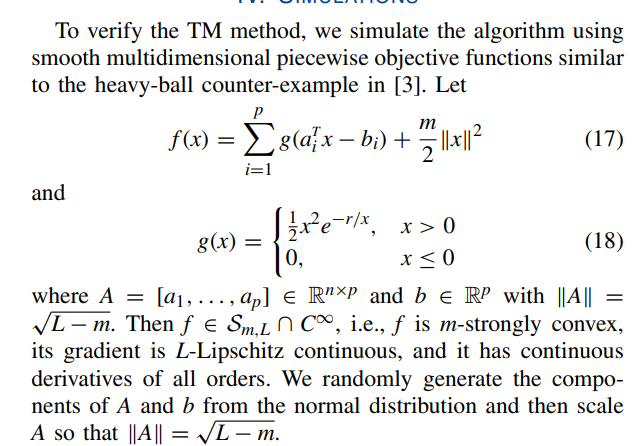

In [ ]:
def TMM(grad, x_0, mu, L, N):
  q = mu/L
  if q == 1:
    print(f"mu can't equal to L (trivial case)")
    return None, None, None
  if q==0 :
    print(f"TTM is undefined, mu == 0")
    return None, None, None
  ro = 1-np.sqrt(q)
  alpha = (1+ro)/L
  beta = ro**2/(2-ro)
  gamma = ro**2/((1+ro)*(2-ro))
  delta = ro**2/(1-ro**2)

  ksi = np.empty((N+2, x_0.shape[0]))
  x = np.empty((N+1, x_0.shape[0]))
  y = np.empty((N+1, x_0.shape[0]))
  
  ksi[1] = x_0
  ksi[0] = x_0
  x[0]=y[0]= x_0

  for k in range(N):
    y[k+1] = (1+gamma)*ksi[k+1] - gamma*ksi[k]
    x[k+1] = (1+delta)*ksi[k+1] - delta*ksi[k]
    ksi[k+2] = (1+beta)*ksi[k+1] - beta*ksi[k]-alpha*grad(y[k+1])

  njev = N
  return x, njev

In [ ]:
def FGM1(grad, x_0, mu, L, N):
  q = mu/L

  if q == 1:
    print(f"mu can't equal to L (trivial case)")
    return None, None, None
  

  x = np.empty((N+1, x_0.shape[0]))
  y = np.empty((N+1, x_0.shape[0]))
  
  x[0] = y[0]= x_0

  for k in range(N):
    x[k+1] = y[k] - 1/L*grad(y[k])
    y[k+1] =  x[k+1] + (1-np.sqrt(q))/(1+np.sqrt(q))*(x[k+1]-x[k])

  njev = N
  return x, njev

In [ ]:
def OGM1(grad, x_0, mu, L, N):
  q = mu/L
  if q == 1:
    print(f"mu can't equal to L (trivial case)")
    return None, None, None

  teta = np.zeros(N+1)
  x = np.empty((N+1, x_0.shape[0]))
  y = np.empty((N+1, x_0.shape[0]))
  z = np.empty((N+1, x_0.shape[0]))

  z[0]=x[0]=y[0]=x_0
  teta[0] = 1

  for i in range(N):
    y[i+1] = x[i] - 1/L*grad(x[i])

    teta[i+1] = (1+np.sqrt(4*teta[i]**2 + 1))/2
    if i == N-1:
      teta[N] =  (1+np.sqrt(8*teta[N-1]**2 + 1))/2      
    
    x[i+1] = y[i+1] + (teta[i]-1)/teta[i+1]*(y[i+1]- y[i]) + teta[i]/teta[i+1]*(y[i+1]-x[i])

  njev = N
  return x, njev

In [ ]:
def OGM2(grad, x_0, mu, L, N):
  q = mu/L
  if q == 1:
    print(f"mu can't equal to L (trivial case)")
    return None, None, None
    
  teta = np.zeros(N+1)
  x = np.empty((N+1, x_0.shape[0]))
  y = np.empty((N+1, x_0.shape[0]))
  z = np.empty((N+1, x_0.shape[0]))

  z[0]=x[0]=y[0]=x_0
  teta[0] = 1

  sum_grads_x_teta = 0
  for i in range(N):
    y[i+1] = x[i] - 1/L*grad(x[i])

    sum_grads_x_teta+=teta[i]*grad(x[i])
    z[i+1] = x[0] - 2/L*sum_grads_x_teta

    teta[i+1] = (1+np.sqrt(4*teta[i]**2 + 1))/2
    if i == N-1:
      teta[N] =  (1+np.sqrt(8*teta[N-1]**2 + 1))/2      

    x[i+1] = (1-1/teta[i+1])*y[i+1] + 1/teta[i+1]*z[i+1]

  njev = N
  return x, njev

# Visualization of iterations

In [ ]:
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import numpy as np

def plot_3d_function(x, x1, x2, f, title, *f_params, minima = None, iterations = None):
    '''
    '''
    low_lim_1 = x1.min()
    low_lim_2 = x2.min()
    up_lim_1  = x1.max()
    up_lim_2  = x2.max()

    X1,X2 = np.meshgrid(x1, x2) # grid of point
    Z = np.zeros_like(X1)
    for i in range(Z.shape[0]):
      for j in range(Z.shape[1]):
        Z[i,j] =  f(np.array([X1[i,j], X2[i,j]])) # evaluation of the function on the grid
    
    # set up a figure twice as wide as it is tall
    fig = plt.figure(figsize=(16,7))
    fig.suptitle(title)

    #===============
    #  First subplot
    #===============
    # set up the axes for the first plot
    ax = fig.add_subplot(1, 2, 1, projection='3d')

    # plot a 3D surface like in the example mplot3d/surface3d_demo
    surf = ax.plot_surface(X1, X2, Z, rstride=1, cstride=1, 
                        cmap=cm.RdBu,linewidth=0, antialiased=False)

    ax.zaxis.set_major_locator(LinearLocator(10))
    ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))
    if minima is not None:
        minima_ = np.array(minima).reshape(-1, 1)
        # ax.plot(*minima_, f(np.array([minima_[0], minima_[1]])), 'r*', markersize=10)
    
    

    #===============
    # Second subplot
    #===============
    # set up the axes for the second plot
    ax = fig.add_subplot(1, 2, 2)

    # plot a 3D wireframe like in the example mplot3d/wire3d_demo
    im = ax.imshow(Z, cmap=plt.cm.RdBu,  extent=[low_lim_1, up_lim_1, low_lim_2, up_lim_2]) #КОстыль, потому что оно почяему-то повернуто 
    cset = ax.contour(x1, x2,Z,linewidths=2,cmap=plt.cm.Set2)
    ax.clabel(cset,inline=True,fmt='%1.1f',fontsize=10)
    fig.colorbar(im)
    ax.set_xlabel(f'$x_1$')
    ax.set_ylabel(f'$x_2$')
    
    if minima is not None:
        minima_ = np.array(minima).reshape(-1, 1)
        ax.plot(*minima_, 'r*', markersize=10)
    
    if iterations is not None:
        for point in iterations:
            ax.plot(*point, 'go', markersize=3)
        iterations = np.array(iterations).T
        ax.quiver(iterations[0,:-1], iterations[1,:-1], iterations[0,1:]-iterations[0,:-1], iterations[1,1:]-iterations[1,:-1], scale_units='xy', angles='xy', scale=1, color='blue')

    plt.show()

In [ ]:
d = 2
x_0 = np.ones(d)*2
N = 100
l = np.random.random_sample(d)
b = np.random.random_sample(d)
A = np.diag(l)

mu = np.min(l)
L = np.max(l)


def grad(x):
  return 1/2*(A+A.T) @ x - b

def f(x):
  return 1/2*(x.T @ A @ x) - x.T @ b

optimal = 2*np.linalg.inv(A+A.T)@b
optimal_func = f(optimal)

y,x,z, njev = taylor_drori(grad, x_0, mu, L, N)
# print(y)
# print(x)
# print(z)

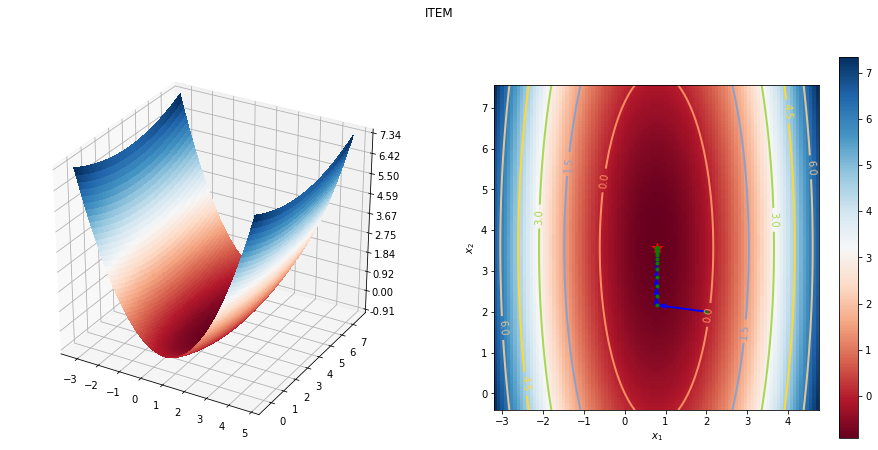

In [ ]:
from scipy.optimize import minimize_scalar



iterations = x
graph_size = 2*np.linalg.norm(optimal - x_0)
x1= np.linspace(optimal[0]-graph_size,optimal[0]+graph_size, 100)
x2 = np.linspace(optimal[1]-graph_size,optimal[1]+graph_size,100)
k=d
plot_3d_function(x_0, x1, x2, f, "ITEM", k, minima=optimal, iterations = iterations)

# Testing func_error from Nsteps

$f = - e^{-1/(1-|x|)}, |x| < 1 .$ Здесь $\mu = 0, L = 1$
https://math.stackexchange.com/questions/4091768/proof-involving-the-sum-of-l-smooth-functions?rq=1

In [ ]:
d = 10

def grad(x):
  return 1/2*(A+A.T) @ x - b

def f(x):
  return 1/2*(x.T @ A @ x) - x.T @ b

In [ ]:
from scipy.optimize import basinhopping
from scipy.optimize import minimize
# ret = basinhopping(f, x_0)

Nsteps = 1000
Ntrials = 100
scipy_min_points = np.zeros(Nsteps)
taylor_drori_points=np.zeros(Nsteps)
grad_points = np.zeros(Nsteps)
ogm1_points = np.zeros(Nsteps)
ogm2_points = np.zeros(Nsteps)
tmm_points = np.zeros(Nsteps)
fgm1_points = np.zeros(Nsteps)
fgm2_points = np.zeros(Nsteps)

# print(f'scipy minimize: func={ret.fun}, njev={ret.njev}')
# print(f'taylor_drori: func={f(x[-1])}, njev={njev}'

for i in range(Ntrials):
    print(f'trial={i}/{Ntrials}')
    l = np.random.random_sample(d)
    b = np.random.random_sample(d)
    # b = np.zeros(d)
    A = np.diag(l)
    if np.unique(l).size != l.size:
      continue

    mu = np.min(l)
    L = np.max(l)
    optimal = 2*np.linalg.inv(A+A.T)@b
    optimal_func = f(optimal)

    x_0 = optimal + np.ones(d)*10

    # нормируем на квадрат расстояния до оптимума
    sq_distance = np.linalg.norm(x_0-optimal)**2

    y,x,z, njev = taylor_drori(grad, x_0, mu,L, Nsteps)
    taylor_drori_points += [(f(x[i]) - optimal_func)/sq_distance for i in range(1, njev+1)]

    x = gradient_descent(grad, x_0, 2./(mu+L), Nsteps)
    grad_points += [(f(x[i]) - optimal_func)/sq_distance for i in range(1,x.shape[0])]

    x, njev = OGM1(grad, x_0, mu , L, Nsteps)
    ogm1_points += [(f(x[i]) - optimal_func)/sq_distance for i in range(1, njev+1)]

    tmm_res, njev = TMM(grad, x_0, mu , L, Nsteps)
    tmm_points += [(f(tmm_res[i]) - optimal_func)/sq_distance for i in range(1, njev+1)]

    x, njev = FGM1(grad, x_0, mu , L, Nsteps)
    fgm1_points += [(f(x[i]) - optimal_func)/sq_distance for i in range(1,njev+1)]


grad_points/= Ntrials
ogm1_points /= Ntrials
ogm2_points /= Ntrials
tmm_points /= Ntrials
fgm1_points /= Ntrials
fgm2_points /= Ntrials
taylor_drori_points /= Ntrials


trial=0/100


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: RuntimeWarning: overflow encountered in multiply
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: RuntimeWarning: invalid value encountered in add
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: RuntimeWarning: invalid value encountered in multiply
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: invalid value encountered in true_divide
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: RuntimeWarning: invalid value encountered in subtract


trial=1/100
trial=2/100
trial=3/100
trial=4/100
trial=5/100
trial=6/100
trial=7/100
trial=8/100
trial=9/100
trial=10/100
trial=11/100
trial=12/100
trial=13/100
trial=14/100
trial=15/100
trial=16/100
trial=17/100
trial=18/100
trial=19/100
trial=20/100
trial=21/100
trial=22/100
trial=23/100
trial=24/100
trial=25/100
trial=26/100
trial=27/100
trial=28/100
trial=29/100
trial=30/100
trial=31/100
trial=32/100
trial=33/100
trial=34/100
trial=35/100
trial=36/100
trial=37/100
trial=38/100
trial=39/100
trial=40/100
trial=41/100
trial=42/100
trial=43/100
trial=44/100
trial=45/100
trial=46/100
trial=47/100
trial=48/100
trial=49/100
trial=50/100
trial=51/100
trial=52/100
trial=53/100
trial=54/100
trial=55/100
trial=56/100
trial=57/100
trial=58/100
trial=59/100
trial=60/100
trial=61/100
trial=62/100
trial=63/100
trial=64/100
trial=65/100
trial=66/100
trial=67/100
trial=68/100
trial=69/100
trial=70/100
trial=71/100
trial=72/100
trial=73/100
trial=74/100
trial=75/100
trial=76/100
trial=77/100
trial=78

In [ ]:
optimal = 2*np.linalg.inv(A+A.T)@b
print(f(optimal))

-136.8677825491607


trial=0/100


ValueError: ignored

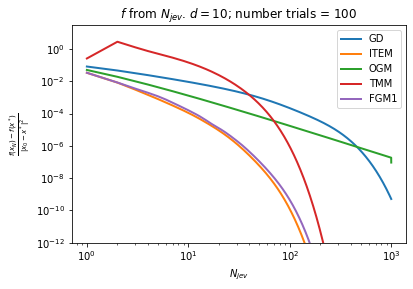

In [ ]:
import matplotlib.pyplot as plt
# plt.scatter(*zip(*scipy_min_points), label = 'Scipy minimize')
# plt.scatter(*zip(*grad_points) , label= 'Gradient descent')
# plt.scatter(*zip(*taylor_drori_points) , label= 'ITEM')
# plt.scatter(*zip(*ogm_points) , label= 'OGM')
# plt.scatter(*zip(*tmm_points) , label= 'TMM')

X = np.arange(1, Nsteps+1)
linewidth = 2
plt.plot(X,grad_points , label= 'GD', linewidth=linewidth)
plt.plot(X, taylor_drori_points , label= 'ITEM',linewidth=linewidth)
plt.plot(X, ogm1_points , label= 'OGM', linewidth=linewidth)
plt.plot(X, tmm_points , label= 'TMM', linewidth=linewidth)
plt.plot(X, fgm1_points , label= 'FGM1', linewidth=linewidth)

plt.xlabel('$N_{{jev}}$')
plt.ylabel('$\\frac{f(x_N) - f(x^*)}{\|x_0 - x^*\|^2}$')
plt.yscale('log')
plt.xscale('log')
plt.ylim((1e-12, None))
plt.legend(markerscale = 10)
plt.title(f'$f$ from $N_{{jev}}$. $ d={d}$; number trials = {Ntrials}')
plt.savefig(f"d1={d}.png")
plt.show()

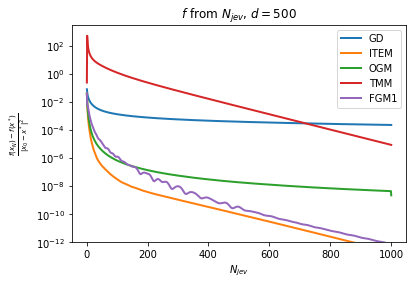

In [ ]:
import matplotlib.pyplot as plt
# plt.scatter(*zip(*scipy_min_points), label = 'Scipy minimize')
# plt.scatter(*zip(*grad_points) , label= 'Gradient descent')
# plt.scatter(*zip(*taylor_drori_points) , label= 'ITEM')
# plt.scatter(*zip(*ogm_points) , label= 'OGM')
# plt.scatter(*zip(*tmm_points) , label= 'TMM')

X = np.arange(1, Nsteps+1)
linewidth = 2
plt.plot(X,grad_points , label= 'GD', linewidth=linewidth)
plt.plot(X, taylor_drori_points , label= 'ITEM',linewidth=linewidth)
plt.plot(X, ogm1_points , label= 'OGM', linewidth=linewidth)
plt.plot(X, tmm_points , label= 'TMM', linewidth=linewidth)
plt.plot(X, fgm1_points , label= 'FGM1', linewidth=linewidth)

plt.xlabel('$N_{{jev}}$')
plt.ylabel('$\\frac{f(x_N) - f(x^*)}{\|x_0 - x^*\|^2}$')
plt.yscale('log')
# plt.xscale('log')
plt.ylim((1e-12, None))
plt.legend(markerscale = 10)
plt.title(f'$f$ from $N_{{jev}}$, $ d={d}$')
plt.savefig(f"d1={d}.png")
plt.show()

TypeError: ignored

# Methods' implementation depending on function Error

In [ ]:
import math
import numpy as np

In [ ]:
def taylor_drori2(grad, x_0, mu, L, optimal, eps=1e-7, maxiter=10000):
  z = []
  x = []
  y = []
  A = []
  delta = []
  b = []
  z.append(x_0)
  x.append(x_0)
  y.append(x_0)
  A.append(0)
  q = mu/L
  if q ==1:
    print(f"mu can't equal to L (trivial case)")
    return None, None, None
  k=0
  while abs(f(optimal) - f(x[k]))>eps and k<maxiter :
    A.append(((1+q)*A[k]+2*(1+np.sqrt((1+A[k])*(1+q*A[k]))))/(1-q)**2)
    b.append(A[k]/((1-q)*A[k+1]))
    delta.append(1/2.*(((1-q)**2)*A[k+1]-(1+q)*A[k])/(1+q+q*A[k]))
    y.append((1-b[k])*z[k]+b[k]*x[k])
    x.append(y[k]-1/L*grad(y[k]))
    z.append((1-q*delta[k])*z[k]+q*delta[k]*y[k]- delta[k]/L*grad(y[k]))
    k+=1
  njev = k
  return y,x,z, njev
# y for optimizing function values, while z for disctance to the optimal solution


In [ ]:
def gradient_descent2(grad, x_0, step, optimal, eps=1e-7, maxiter=10000):
    w = [x_0]
    i=0
    while abs(f(optimal) - f(x[i]))>eps and i<maxiter:
      w.append(w[i]-step*grad(w[i]))
      i+=1
    return w, i

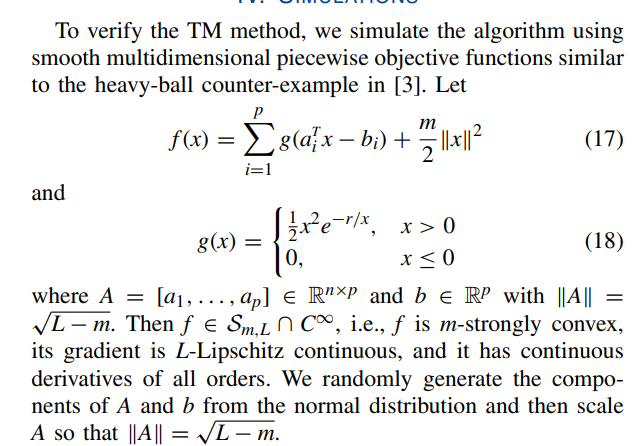

In [ ]:
def TMM2(grad, x_0, mu, L, optimal, eps=1e-7, maxiter=10000):
  q = mu/L
  if q == 1:
    print(f"mu can't equal to L (trivial case)")
    return None, None, None
  if q==0 :
    print(f"TTM is undefined, mu == 0")
    return None, None, None
  ro = 1-np.sqrt(q)
  alpha = (1+ro)/L
  beta = ro**2/(2-ro)
  gamma = ro**2/((1+ro)*(2-ro))
  delta = ro**2/(1-ro**2)

  ksi = []
  x =[]
  y = []
  
  ksi.append(x_0)
  ksi.append(x_0)
  x.append(x_0)
  y.append(x_0)
  k=0
  while abs(f(optimal) - f(x[k]))>eps and k<maxiter:
    y.append((1+gamma)*ksi[k+1] - gamma*ksi[k])
    x.append((1+delta)*ksi[k+1] - delta*ksi[k])
    ksi.append((1+beta)*ksi[k+1] - beta*ksi[k]-alpha*grad(y[k+1]))
    k+=1

  njev = N
  return x, njev

In [ ]:
def FGM2(grad, x_0, mu, L, optimal, eps=1e-7, maxiter=10000):
  q = mu/L
  if q == 1:
    print(f"mu can't equal to L (trivial case)")
    return None, None, None
  if q==0 :
    print(f"TTM is undefined, mu == 0")
    return None, None, None
  ro = 1-np.sqrt(q)
  alpha = (1+ro)/L
  beta = ro**2/(2-ro)
  gamma = ro**2/((1+ro)*(2-ro))
  delta = ro**2/(1-ro**2)

  ksi = np.empty((N+2, x_0.shape[0]))
  x = np.empty((N+1, x_0.shape[0]))
  y = np.empty((N+1, x_0.shape[0]))
  
  ksi[0] = ksi[1] = x_0
  x[0]=y[0]= x_0

  for k in range(N):
    y[k+1] = (1+gamma)*ksi[k+1] - gamma*ksi[k]
    x[k+1] = (1+delta)*ksi[k+1] - delta*ksi[k]
    ksi[k+2] = (1+beta)*ksi[k+1] - beta*ksi[k]-alpha*grad(y[k+1])

  njev = k
  return x, njev

In [ ]:
def OGM2(grad, x_0, mu, L, optimal, eps=1e-7, maxiter=10000):
  q = mu/L
  if q == 1:
    print(f"mu can't equal to L (trivial case)")
    return None, None, None
    
  x =[x_0]
  y =[x_0]
  z =[x_0]
  teta = [1]

  i=0
  while abs(f(optimal) - f(x[i]))>eps and i<maxiter:
    y.append(x[i] - 1/L*grad(x[i]))

    teta.append((1+np.sqrt(4*teta[i]**2 + 1))/2)
    # if i == N-1:
    #   teta[N] =  (1+np.sqrt(8*teta[N-1]**2 + 1))/2      
    x.append( y[i+1] + (teta[i]-1)/teta[i+1]*(y[i+1]- y[i]) + teta[i]/teta[i+1]*(y[i+1]-x[i]))
    i+=1
  njev = i
  return x, njev

# Testing Nsteps from dimension

In [ ]:
def grad(x):
  return 1/2*(A+A.T) @ x - b

def f(x):
  return 1/2*(x.T @ A @ x) - x.T @ b

In [ ]:
from scipy.optimize import basinhopping
from scipy.optimize import minimize
# ret = basinhopping(f, x_0)
        
# print(f'scipy minimize: func={ret.fun}, njev={ret.njev}')
# print(f'taylor_drori: func={f(x[-1])}, njev={njev}'
Nsteps = 10000
Ntrials = 10
scipy_min_points = []
taylor_drori_points= []
grad_points = []
ogm_points = []
tmm_points = []
fgm_points = []
d_points = np.arange(10, 500, 50)
eps = 1e-12

for d in d_points:
    print(f'dim={d}')
    l = np.random.random_sample(d)
    b = np.random.random_sample(d)
    # b = np.zeros(d)
    A = np.diag(l)
    if np.unique(l).size != l.size:
      continue


    mu = np.min(l)
    L = np.max(l)
    optimal = 2*np.linalg.inv(A+A.T)@b
    optimal_func = f(optimal)

    x_0 = optimal + np.ones(d)*10

    # ret1 = minimize(f, x_0, jac=grad, options={"maxiter":N})
    # scipy_min_points.append((ret1.njev,abs(ret1.fun-optimal_func)))
    
    y,x,z,njev1 = taylor_drori2(grad, x_0, mu,L, optimal, eps, Nsteps)
    print(njev1)
    taylor_drori_points.append((d, njev1))

    x, njev2 = gradient_descent2(grad, x_0, 2./(mu+L), optimal, eps, Nsteps)
    print(d, njev2)
    grad_points.append((d, njev2))

    x, njev = OGM2(grad, x_0, mu , L, optimal, eps, Nsteps)
    ogm_points.append((d, njev))

    x, njev = TMM2(grad, x_0, mu , L, optimal, eps, Nsteps)
    tmm_points.append((d, njev))

    # x, njev = FGM(grad, x_0, mu , L,  optimal, eps, Nsteps)
    # fgm_points += [(i,abs(f(x[i]) - optimal_func)) for i in range(1,njev+1)]



2232
260 2232


KeyboardInterrupt: ignored

In [ ]:
optimal = 2*np.linalg.inv(A+A.T)@b
print(f(optimal))

-140.80275420590138


In [ ]:
print(grad_points)

[(10, 402), (60, 653), (110, 2280), (160, 1737), (210, 2077), (260, 2143), (310, 2107), (360, 2136), (410, 2195), (460, 2152)]


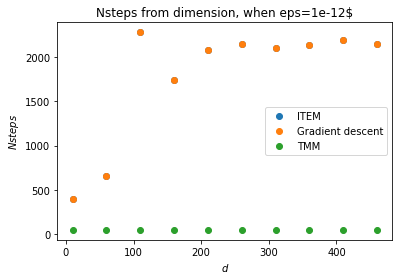

In [ ]:
import matplotlib.pyplot as plt
# plt.scatter(*zip(*scipy_min_points), label = 'Scipy minimize')
# plt.scatter(*zip(*grad_points) , label= 'Gradient descent')
# plt.scatter(*zip(*taylor_drori_points) , label= 'ITEM')
# plt.scatter(*zip(*ogm_points) , label= 'OGM')
# plt.scatter(*zip(*tmm_points) , label= 'TMM')

X = np.arange(1, Nsteps+1)
plt.scatter(*zip(*taylor_drori_points) , label= 'ITEM')
plt.scatter(*zip(*grad_points) , label= 'Gradient descent')
# plt.scatter(*zip(*ogm_points) , label= 'OGM')
# plt.scatter(*zip(*fgm_points) , label= 'FGM')
plt.scatter(*zip(*tmm_points) , label= 'TMM')

plt.xlabel('$d$')
plt.ylabel('$Nsteps$')
plt.legend()
plt.title(f'Nsteps from dimension, when eps={eps}$')
plt.savefig(f"d1={d}.png")
plt.show()

In [ ]:
plt.scatter(*zip(*scipy_min_points), label = 'Scipy minimize')
plt.scatter(*zip(*taylor_drori_points) , label= 'Taylor-Drori')
plt.scatter(*zip(*grad_points) , label= 'Gradient descent')
plt.xlabel('$N_{{jev}}$')
plt.ylabel('$func$')
plt.yscale('log')
plt.legend()
plt.title(f'f from $N_{{jev}}, d={d}$')
plt.savefig(f"d1={d}.png")
plt.show()

TypeError: ignored

# Adaptive ITEM 

In [ ]:
from numpy.linalg import norm

def ACGM(method, grad, x_0, L_0, mu_0, beta, eps, maxiter = 10000):
  x = np.zeros((maxiter+1, x_0.size))
  mu = np.zeros(maxiter+1)
  mu[0] = mu_0
  x[0] = x_0
  Njev = 0
  for k in range(1, maxiter+1):
    if norm(grad(x[k-1])) < eps:
      break
    mu[k] =  beta*mu[k-1]

    while True:
      Nsteps = int(2*np.sqrt(2*L/mu[k])) + 1 #согласно статье https://arxiv.org/pdf/2009.03971.pdf
      y,x_res,z_res, njev = method(grad, x[k-1], mu[k] ,L, Nsteps)
      Njev += njev
      x[k] = y[-1]
      if norm(grad(x[k])) <= 1/2*norm(grad(x[k-1])):
        print(1)
        break
      mu[k] /= beta
      if norm(grad(x[k])) < norm(grad(x[k-1])):
        
        print(2, x[k])
        x[k-1] = x[k]
  print(mu[:k])
  Njev += k
  return x[:k], Njev
    

In [ ]:
ACGM(taylor_drori, grad, x_0, L, mu/9, 4, 1e-12)

1
1
1
2 [0.7787569  3.57216426]
2 [0.77875571 3.57146869]
1
2 [0.77875571 3.57024068]
1
2 [0.77875571 3.57002189]
1
2 [0.77875571 3.56998291]
1
2 [0.77875571 3.56997597]
1
2 [0.77875571 3.56997473]
1
2 [0.77875571 3.56997451]
1
2 [0.77875571 3.56997447]
1
2 [0.77875571 3.56997446]
1
2 [0.77875571 3.56997446]
1
2 [0.77875571 3.56997446]
1
2 [0.77875571 3.56997446]
1
[0.01095093 0.04380373 0.17521493 0.70085972 0.17521493 0.17521493
 0.17521493 0.17521493 0.17521493 0.17521493 0.17521493 0.17521493
 0.17521493 0.17521493 0.17521493 0.17521493]


(array([[2.        , 2.        ],
        [0.75020545, 3.58282724],
        [0.77797531, 3.57333032],
        [0.77875571, 3.57146869],
        [0.77875571, 3.57024068],
        [0.77875571, 3.57002189],
        [0.77875571, 3.56998291],
        [0.77875571, 3.56997597],
        [0.77875571, 3.56997473],
        [0.77875571, 3.56997451],
        [0.77875571, 3.56997447],
        [0.77875571, 3.56997446],
        [0.77875571, 3.56997446],
        [0.77875571, 3.56997446],
        [0.77875571, 3.56997446],
        [0.77875571, 3.56997446]]), 175)

In [ ]:
optimal

array([0.77875571, 3.56997446])

In [ ]:
def ITEM_Lipschitz(f, grad, x_0, mu, L, N):
  z = np.empty((N+1, x_0.shape[0]))
  x = np.empty((N+1, x_0.shape[0]))
  y = np.empty((N, x_0.shape[0]))
  A = np.empty((N+1, 1))
  delta = np.empty((N, 1))
  b = np.empty((N, 1))
  z[0] = x_0
  x[0]=x_0
  y[0] = x_0
  A[0] = 0
  L /= 2
  flag = True
  while flag:
    q = mu/L
    if q ==1:
      print(f"mu can't equal to L (trivial case)")
      return None, None, None  
    flag = False
    for k in range(N):
      A[k+1]=(((1+q)*A[k]+2*(1+np.sqrt((1+A[k])*(1+q*A[k]))))/(1-q)**2)
      b[k]=(A[k]/((1-q)*A[k+1]))
      delta[k]=(1/2.*(((1-q)**2)*A[k+1]-(1+q)*A[k])/(1+q+q*A[k]))
      y[k]=((1-b[k])*z[k]+b[k]*x[k])
      x[k+1]=(y[k]-1/L*grad(y[k]))
      if f(x[k+1]) > f(y[k]) - 1/(2*L)*np.linalg.norm(grad(y[k]))**2:
        L *= 2
        flag = True
        break
      z[k+1]=((1-q*delta[k])*z[k]+q*delta[k]*y[k]- delta[k]/L*grad(y[k]))
  return y,x,z, L
# y for optimizing function values, while z for disctance to the optimal solution



In [ ]:
def ALGM(method, f, grad, x_0, L_0, mu_0, beta, eps, maxiter = 10000):
  x = np.zeros((maxiter+1, x_0.size))
  mu = np.zeros(maxiter+1)
  L = np.zeros(maxiter+1)
  mu[0] = mu_0
  L[0] = L_0
  x[0] = x_0
  Njev = 0
  for k in range(1, maxiter+1):
    if norm(grad(x[k-1])) < eps:
      break
    mu[k] =  beta*mu[k-1]

    while True:
      Nsteps = int(np.sqrt(8*L[k-1]/mu[k])) + 1 #согласно статье https://arxiv.org/pdf/2009.03971.pdf
      print(Nsteps)
      y,x_res,z_res, L[k] = method(f, grad, x[k-1], mu[k] ,L[k-1], Nsteps)
      print( y[-1], L[k])
      x[k] = y[-1]
      Njev += njev
      mu[k] = mu[k]*L[k]/L[k-1]
      if norm(grad(x[k])) <= 1/2*norm(grad(x[k-1])):
        print(1)
        break
      mu[k] /= beta
      if norm(grad(x[k])) < norm(grad(x[k-1])):
        
        print(2, x[k])
        x[k-1] = x[k]
  print(mu[:k])
  Njev += k
  return x[:k], Njev
    

In [ ]:
ALGM(ITEM_Lipschitz,f,  grad, x_0, 2*L, mu, 4, 1e-12)

7
[0.78099029 2.98073781] 0.9441269806850191
1
4
[0.77848443 3.21065499] 0.47206349034250955
2 [0.77848443 3.21065499]
9
[0.77874737 3.53721291] 0.9441269806850191
1
5
[0.77873968 3.55830305] 0.47206349034250955
1
3
[0.77874625 3.56135209] 0.23603174517125478
2 [0.77874625 3.56135209]
7
[0.77875508 3.56833978] 0.9441269806850191
1
4
[0.77875579 3.56897763] 0.47206349034250955
2 [0.77875579 3.56897763]
9
[0.77875572 3.56988357] 0.9441269806850191
1
5
[0.77875572 3.56994208] 0.47206349034250955
1
3
[0.77875572 3.56995054] 0.23603174517125478
2 [0.77875572 3.56995054]
7
[0.77875571 3.56996993] 0.9441269806850191
1
4
[0.77875571 3.5699717 ] 0.47206349034250955
2 [0.77875571 3.5699717 ]
9
[0.77875571 3.56997421] 0.9441269806850191
1
5
[0.77875571 3.56997437] 0.47206349034250955
1
3
[0.77875571 3.56997438] 1.8882539613700382
2 [0.77875571 3.56997438]
3
[0.77875571 3.5699744 ] 0.23603174517125478
2 [0.77875571 3.5699744 ]
7
[0.77875571 3.56997445] 0.9441269806850191
1
4
[0.77875571 3.56997446

(array([[2.        , 2.        ],
        [0.77848443, 3.21065499],
        [0.77874737, 3.53721291],
        [0.77874625, 3.56135209],
        [0.77875579, 3.56897763],
        [0.77875572, 3.56988357],
        [0.77875572, 3.56995054],
        [0.77875571, 3.5699717 ],
        [0.77875571, 3.56997421],
        [0.77875571, 3.5699744 ],
        [0.77875571, 3.56997446],
        [0.77875571, 3.56997446],
        [0.77875571, 3.56997446],
        [0.77875571, 3.56997446],
        [0.77875571, 3.56997446]]), 8115)